# Task 2

## (a)

\begin{aligned}
\sigma(z)&=\frac{1}{1+e^{-z}}\\
\frac{d}{dz} \sigma(z) &= \frac{d}{dz}(1+e^{-z})^-1=-(1+e^{-z})^{-2}(-e^{-z})=\frac{e^{-z}}{(1+e^{-z})^{2}}
\end{aligned}

## (b)

\begin{aligned}
\sigma(z)&=\frac{1}{1+e^{-z}}\\
\frac{d}{dz} \sigma(z) &= \frac{e^{-z}}{(1+e^{-z})^{2}}=\frac{1+e^{-z}-1}{(1+e^{-z})^{2}}=\sigma(z)^2(1+e^{-z}-1)\\
&=\sigma(z)^2(\sigma(z)^{-1}-1)=\sigma(z)(1-\sigma(z))
\end{aligned}

## (c)

\begin{aligned}
	\zeta(z)&=-\text{log}(\sigma(-z))=-\text{log}\left(\frac{1}{1+e^z}\right)\\
	\\
	\frac{d}{dz} \zeta(z) &= -\frac{1}{\sigma(-z)} \sigma(-z)(1-\sigma(-z)) = (1-\sigma(-z)) \\
	\\
	\frac{d^2}{dz^2} \zeta(z) &=\frac{d}{dz} (1-\sigma(-z))=-(-\sigma(-z)(1-\sigma(-z)))\\
	&=\sigma(-z)(1-\sigma(-z))
\end{aligned}

Now in order to find the boundaries we let the variable $z$ run to infinity in both directions

\begin{aligned}
\lim_{z\to+\infty}\zeta(z)&=-\text{log}\left(\frac{1}{1+e^\infty}\right)
=-\text{log}\left(\frac{1}{\infty}\right)
=-\text{log}\left(0\right)=\infty \\
\lim_{z\to-\infty}\zeta(z)&=-\text{log}\left(\frac{1}{1+e^{-\infty}}\right)
=-\text{log}\left(\frac{1}{1+0}\right)
=-\text{log}\left(1\right)=0
\end{aligned}

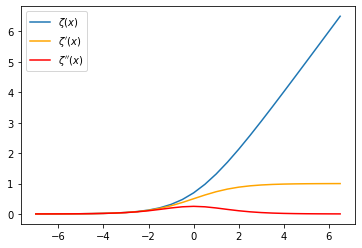

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.e**(-x))

def zeta(x):
    return -np.log(sigmoid(-x))

def zeta_prime(x):
    return 1-sigmoid(-x)

def zeta_double_prime(x):
    return sigmoid(-x)*(1-sigmoid(-x))

x_range = np.arange(-7, 7, .5)
plt.plot(x_range, zeta(x_range), label="$\zeta(x)$")
plt.plot(x_range, zeta_prime(x_range), c="orange", label="$\zeta^\prime(x)$")
plt.plot(x_range, zeta_double_prime(x_range), c="red", label="$\zeta^{\prime\prime}(x)$")
plt.legend()

## (d)

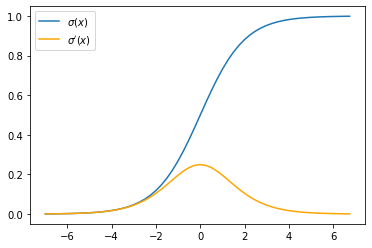

In [3]:
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

x_range = np.arange(-7, 7, .25)
plt.plot(x_range, sigmoid(x_range), label="$\sigma(x)$")
plt.plot(x_range, sigmoid_prime(x_range), c="orange", label="$\sigma^\prime(x)$")
plt.legend()

## (f)

\begin{aligned}
c_1(x)=SE(x) &= (\sigma(x)-1)^2 \\
\\
\frac{d}{d x} SE(x)&= 2(\sigma(x)-1)\sigma(x)(1-\sigma(x))=2\sigma(x)(\sigma(x)-1) (1-\sigma(x)) \\
&=2\sigma(x)(\sigma(x)-\sigma(x)^2-1+\sigma(x))=-2\sigma(x)(\sigma(x)^2-2\sigma(x)+1) \\
&=-2\sigma(x)(\sigma(x)-1)^2 \\
\\
\frac{d^2}{d x^2} SE(x)&=-2\sigma(x)(1-\sigma(x))(\sigma(x)-1)^2-2\sigma(x)2(\sigma(x)-1)\sigma(x)(1-\sigma(x))\\
&=-2\sigma(x)(1-\sigma(x))((\sigma(x)-1)^2+2\sigma(x)(\sigma(x)-1))=-2\sigma(x)(1-\sigma(x))(\sigma(x)-1)(\sigma(x)-1+2\sigma(x)) \\
&=2\sigma(x)(\sigma(x)-1)^2(3\sigma(x)-1) \\
&=\sigma(x)(\sigma(x)-1)^2(6\sigma(x)-2) 
\\ \\
\sigma(x)&\to(0,1) \\
(\sigma(x)-1)^2&\to(0,1) \\
(6\sigma(x)-2) &\to \left\{\begin{array}{lr}
        [0, -2), & \text{for } x \leq -\text{ln}(2) \\
        (0, 4), & \text{for } x > -\text{ln}(2)
        \end{array}\right\} \to \text{hence SE is non convex}
\end{aligned}

If we start at some initial point $x_0 << 0$ we will have a gradient that is very close to zero because

$$
\lim_{x\to-\infty}{\frac{d}{d x} SE(x)}=\lim_{x\to-\infty}{-2\sigma(x)(\sigma(x)-1)^2 }={-2\sigma(-\infty)(\sigma(-\infty)-1)^2 }={-2\cdot 0(0-1)^2 }=0
$$

Hence the gradient update step $x_{t}\leftarrow x_{t-1}-\frac{d}{dx}f(x_{t-1})$ will push the algorithm only very little into the correct direction. That direction will still minimize the squared error $c_1$, but it will do so very slowly. This phenomenon is also known as the vanishing gradient problem.

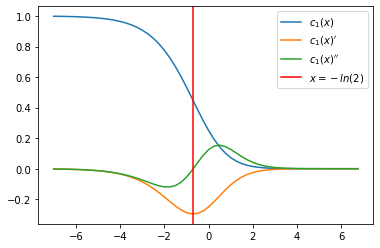

In [4]:
def c1(x):
    return (sigmoid(x) - 1)**2

def c1_prime(x):
    return -2*sigmoid(x)*(sigmoid(x)-1)**2

def c1_prime_prime(x):
    return sigmoid(x)*(sigmoid(x)-1)**2*(6*sigmoid(x)-2)

x_range = np.arange(-7, 7, .25)
plt.plot(x_range, c1(x_range), label="$c_1(x)$")
plt.plot(x_range, c1_prime(x_range), label="$c_1(x)^\prime$")
plt.plot(x_range, c1_prime_prime(x_range), label="$c_1(x)^{\prime\prime}$")
plt.axvline(-np.log(2), c="r", label="$x=-ln(2)$")
plt.legend()

## (g)

\begin{aligned}
c_{2}(x)=CE(x)&=-(y \log (\sigma(w \cdot x))+(1-y) \log (1-\sigma(w \cdot x))) \\ \\
\frac{\partial}{\partial w} CE(x)&=\frac{\partial}{\partial w}-\left(y-\log \sigma(wx)+(1-y) \log \left(1-\sigma(wx)\right)\right)=-\left(\frac{-y}{\sigma(wx)}\sigma(wx)^\prime x+\frac{1-y}{1-\sigma(wx)}\sigma(wx)^\prime x\right) \\
&=-\sigma(wx)^\prime x\left(\frac{-y}{\sigma(wx)}+\frac{1-y}{1-\sigma(wx)}\right)=-\sigma(wx)^\prime x\left(\frac{-y(1-\sigma(wx))+(1-y)\sigma(wx)}{\sigma(wx)^\prime}\right) \\
&=-x(\sigma(wx)-y)=x(y-\sigma(wx)) \\
\\
\frac{\partial^2}{\partial w^2} CE(x) &= \frac{\partial}{\partial w} x(y-\sigma(wx)) = \sigma^\prime(wx) x^2 \\
&= \sigma(wx)(1-\sigma(wx) x^2 \\
\\ \\
\sigma(wx)&\to(0,1) \\
(1-\sigma(wx))^2&\to(0,1) \\
x^2 &\to [0, \infty) \to \text{hence } CE(x) \text{ is convex}
\end{aligned}